In [1]:
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import pandas as pd
import math

%matplotlib inline

Using TensorFlow backend.


In [17]:
dataset =pd.read_csv('ddgokber.csv')

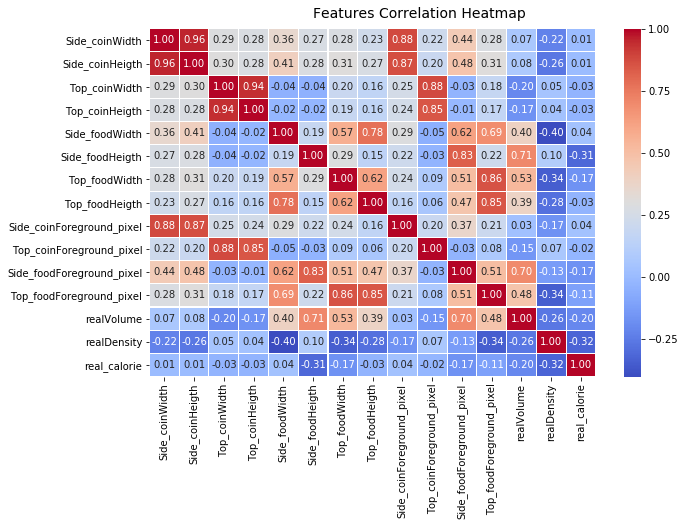

In [18]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features Correlation Heatmap', fontsize=14)

In [19]:
# Get one hot encoding
one_hot = pd.get_dummies(dataset['food_label'])
# Drop columns as it is now encoded
dataset = dataset.drop('food_label',axis = 1)
# Join the encoded df
dataset = dataset.join(one_hot)
dataset

,image_name,Side_coinWidth,Side_coinHeigth,Top_coinWidth,Top_coinHeigth,Side_foodWidth,Side_foodHeigth,Top_foodWidth,Top_foodHeigth,Side_coinForeground_pixel,Top_coinForeground_pixel,Side_foodForeground_pixel,Top_foodForeground_pixel,realVolume,realDensity,real_calorie,column,ellipsoid,irregular
0,orange,79,78,66,65,232,187,202,222,4411,2915,35942,34572,220,0.952273,131.985,0,1,0
1,orange,63,58,63,60,192,181,204,217,2474,2840,28733,33003,220,0.952273,131.985,0,1,0
2,orange,61,58,65,64,175,181,204,224,2575,2695,26475,36850,220,0.952273,131.985,0,1,0
3,orange,75,72,71,66,201,206,222,208,4004,2900,32219,37463,220,0.952273,131.985,0,1,0
4,orange,61,63,60,58,186,166,197,189,2734,2150,25572,27410,220,0.952273,131.985,0,1,0
5,orange,71,69,63,62,219,192,207,204,57,2698,33092,31057,220,0.952273,131.985,0,1,0
6,orange,75,75,63,60,209,217,192,205,4115,2527,34881,32847,220,0.952273,131.985,0,1,0
7,orange,62,59,71,66,203,177,204,230,2502,3051,29213,37675,220,0.952273,131.985,0,1,0
8,orange,61,60,64,62,200,178,224,204,22,2538,27145,34750,220,0.952273,131.985,0,1,0
9,orange,60,60,71,70,172,175,233,261,2734,3272,23357,45889,220,0.952273,131.985,0,1,0


In [20]:
a = dataset.groupby(['image_name'])
b =  a.mean()['realDensity'].to_frame()
dataset = dataset.drop('realDensity', axis=1)
dataset = dataset.merge(b, on='image_name', how='left')

In [21]:
dataset

,image_name,Side_coinWidth,Side_coinHeigth,Top_coinWidth,Top_coinHeigth,Side_foodWidth,Side_foodHeigth,Top_foodWidth,Top_foodHeigth,Side_coinForeground_pixel,Top_coinForeground_pixel,Side_foodForeground_pixel,Top_foodForeground_pixel,realVolume,real_calorie,column,ellipsoid,irregular,realDensity
0,orange,79,78,66,65,232,187,202,222,4411,2915,35942,34572,220,131.985,0,1,0,0.922070
1,orange,63,58,63,60,192,181,204,217,2474,2840,28733,33003,220,131.985,0,1,0,0.922070
2,orange,61,58,65,64,175,181,204,224,2575,2695,26475,36850,220,131.985,0,1,0,0.922070
3,orange,75,72,71,66,201,206,222,208,4004,2900,32219,37463,220,131.985,0,1,0,0.922070
4,orange,61,63,60,58,186,166,197,189,2734,2150,25572,27410,220,131.985,0,1,0,0.922070
5,orange,71,69,63,62,219,192,207,204,57,2698,33092,31057,220,131.985,0,1,0,0.922070
6,orange,75,75,63,60,209,217,192,205,4115,2527,34881,32847,220,131.985,0,1,0,0.922070
7,orange,62,59,71,66,203,177,204,230,2502,3051,29213,37675,220,131.985,0,1,0,0.922070
8,orange,61,60,64,62,200,178,224,204,22,2538,27145,34750,220,131.985,0,1,0,0.922070
9,orange,60,60,71,70,172,175,233,261,2734,3272,23357,45889,220,131.985,0,1,0,0.922070


In [22]:
# Get one hot encoding
one_hot = pd.get_dummies(dataset['image_name'])
# Drop columns as it is now encoded
dataset = dataset.drop('image_name',axis = 1)
# Join the encoded df
dataset = dataset.join(one_hot)
dataset.head()

,Side_coinWidth,Side_coinHeigth,Top_coinWidth,Top_coinHeigth,Side_foodWidth,Side_foodHeigth,Top_foodWidth,Top_foodHeigth,Side_coinForeground_pixel,Top_coinForeground_pixel,...,litchi,mango,mooncake,orange,peach,pear,plum,qiwi,sachima,tomato
0,79,78,66,65,232,187,202,222,4411,2915,...,0,0,0,1,0,0,0,0,0,0
1,63,58,63,60,192,181,204,217,2474,2840,...,0,0,0,1,0,0,0,0,0,0
2,61,58,65,64,175,181,204,224,2575,2695,...,0,0,0,1,0,0,0,0,0,0
3,75,72,71,66,201,206,222,208,4004,2900,...,0,0,0,1,0,0,0,0,0,0
4,61,63,60,58,186,166,197,189,2734,2150,...,0,0,0,1,0,0,0,0,0,0


In [23]:
# Drop the faulty grabcut outputs
dataset = dataset.drop(dataset[dataset['Top_coinForeground_pixel'] < 1000].index)
dataset = dataset.drop(dataset[dataset['Side_coinForeground_pixel'] < 1000].index)
dataset = dataset.drop(dataset[dataset['Top_foodForeground_pixel'] < 1000].index)
dataset = dataset.drop(dataset[dataset['Side_foodForeground_pixel'] < 1000].index)

In [32]:
# Combine and create new features

dataset["top_ratio"] = (dataset['Top_foodHeigth'] * dataset['Top_foodWidth']) / (dataset['Top_coinHeigth'] * dataset['Top_coinWidth'])
dataset['side_ratio'] = (dataset['Side_foodWidth'] * dataset['Side_foodHeigth']) / (dataset['Side_coinHeigth'] * dataset['Side_coinWidth'])
dataset['top_ratio_pixels'] = (dataset['Top_foodForeground_pixel'] / dataset['Top_coinForeground_pixel'])
dataset['side_ratio_pixels'] = (dataset['Side_foodForeground_pixel'] / dataset['Side_coinForeground_pixel'])

dataset['top_coin_ratio'] = 2.5 / ((dataset['Top_coinWidth'] + dataset['Top_coinHeigth']) ) 
dataset['side_coin_ratio'] = 2.5 / ((dataset['Side_coinWidth'] + dataset['Side_coinHeigth'])) 

dataset['top_area'] = (dataset['Top_foodHeigth'] * dataset['Top_foodWidth']) * dataset['top_coin_ratio'] * dataset['top_ratio_pixels']
dataset['side_area'] = (dataset['Side_foodHeigth'] * dataset['Side_foodWidth']) * dataset['side_coin_ratio'] * dataset['side_ratio_pixels']

dataset['kcal'] = dataset['real_calorie'] / (dataset['realDensity'] * dataset['realVolume'])

dataset.head()

,Side_coinWidth,Side_coinHeigth,Top_coinWidth,Top_coinHeigth,Side_foodWidth,Side_foodHeigth,Top_foodWidth,Top_foodHeigth,Side_coinForeground_pixel,Top_coinForeground_pixel,...,tomato,top_ratio,side_ratio,top_ratio_pixels,side_ratio_pixels,top_coin_ratio,side_coin_ratio,top_area,side_area,kcal
0,79,78,66,65,232,187,202,222,4411,2915,...,0,10.453147,7.040571,11.860034,8.148266,0.019084,0.015924,10149.835465,5629.050304,0.650636
1,63,58,63,60,192,181,204,217,2474,2840,...,0,11.711111,9.510673,11.620775,11.613985,0.020325,0.020661,10455.862848,8339.033519,0.650636
2,61,58,65,64,175,181,204,224,2575,2695,...,0,10.984615,8.952798,13.673469,10.281553,0.019380,0.021008,12108.970100,6841.768989,0.650636
3,75,72,71,66,201,206,222,208,4004,2900,...,0,9.854033,7.667778,12.918276,8.046703,0.018248,0.017007,10885.297559,5666.357087,0.650636
4,61,63,60,58,186,166,197,189,2734,2150,...,0,10.699138,8.034348,12.748837,9.353328,0.021186,0.020161,10056.725759,5822.446964,0.650636


In [33]:
# Drop useless features
a = ['Top_coinWidth', 'Top_coinHeigth', 'Side_coinWidth', 'Side_coinHeigth', 'Top_foodHeigth', 'Side_foodHeigth', 'Top_foodWidth', 'Side_foodWidth', 'Side_coinForeground_pixel', 'Top_coinForeground_pixel', 'Side_foodForeground_pixel', 'Top_foodForeground_pixel']
useless_features = ['realVolume',  'real_calorie']
y = dataset['realVolume']
#y = dataset['real_calorie']
temp_X = dataset
X = dataset.drop(useless_features, axis=1)

In [34]:
# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=180)

In [35]:
train_X.columns

Index(['Side_coinWidth', 'Side_coinHeigth', 'Top_coinWidth', 'Top_coinHeigth',
       'Side_foodWidth', 'Side_foodHeigth', 'Top_foodWidth', 'Top_foodHeigth',
       'Side_coinForeground_pixel', 'Top_coinForeground_pixel',
       'Side_foodForeground_pixel', 'Top_foodForeground_pixel', 'column',
       'ellipsoid', 'irregular', 'realDensity', 'apple', 'banana', 'bread',
       'bun', 'doughnut', 'egg', 'fired_dough_twist', 'grape', 'lemon',
       'litchi', 'mango', 'mooncake', 'orange', 'peach', 'pear', 'plum',
       'qiwi', 'sachima', 'tomato', 'top_ratio', 'side_ratio',
       'top_ratio_pixels', 'side_ratio_pixels', 'top_coin_ratio',
       'side_coin_ratio', 'top_area', 'side_area', 'kcal'],
      dtype='object')

In [36]:
# Hyperparameters for random forest
parameters = {'bootstrap': [True],
              'random_state' : [42],
              'min_samples_leaf': [3, 7, 15],
              'criterion' : ['mse'],
              'n_estimators': [50, 100, 300], 
              'min_samples_split': [2, 5, 10, 20],
              'max_features': ['auto'],
              'max_depth': [5, 50, 100, None],
              'max_leaf_nodes': [10, 100, None]}

In [37]:
# Hyperparameters for random forest
params = {'bootstrap': True,
              'random_state' : 42,
              'min_samples_leaf': 2,
              'criterion' : 'mse',
              'n_estimators': 400 ,
              'min_samples_split': 2,
              'max_features': 'auto',
              'max_depth': None,
              'max_leaf_nodes': None}

In [38]:
# Create and train the model
rf_model = RandomForestRegressor(**params)
rf_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
# Grid search
grid_model = GridSearchCV(estimator=rf_model, param_grid=parameters, cv= 5)
grid_model.fit(train_X, train_y)

KeyboardInterrupt: 

In [40]:
from collections import defaultdict



# Get the accuracy of the model
rf_predictions = rf_model.predict(test_X)
score = mean_squared_error(test_y ,rf_predictions)
print(score)
print(math.sqrt(score))

actual = defaultdict(int)
predicted = defaultdict(int)

predicted_calories = defaultdict(int)
actual_calories = defaultdict(int)


i = 0
for pair in test_y.items():
    actual.append(pair[1])
    
    predicted_calories.append(dataset.loc[pair[0]]['realDensity'] * rf_predictions[i] * dataset.loc[pair[0]]['kcal'])
    actual_calories.append(dataset.loc[pair[0]]['real_calorie'])
    
    predicted.append(rf_predictions[i])
    print("actual : " + str(pair[1]) + " predicted : " + str(rf_predictions[i]))
    i += 1


135.34483405674027
11.63377986970444
actual : 90 predicted : 104.74073412698414
actual : 60 predicted : 56.79916666666667
actual : 150 predicted : 150.46166666666667
actual : 330 predicted : 329.9683333333333
actual : 90 predicted : 91.85041666666667
actual : 100 predicted : 113.51817460317461
actual : 90 predicted : 97.57083333333333
actual : 100 predicted : 100.25625
actual : 160 predicted : 159.47863095238094
actual : 100 predicted : 99.86125
actual : 170 predicted : 166.4128273809523
actual : 200 predicted : 212.00755681818183
actual : 180 predicted : 179.06892857142856
actual : 140 predicted : 145.13761904761904
actual : 160 predicted : 160.88791666666665
actual : 270 predicted : 262.4220833333334
actual : 190 predicted : 177.52461309523812
actual : 50 predicted : 49.13833333333333
actual : 220 predicted : 224.7971726190476
actual : 260 predicted : 257.71875000000006
actual : 170 predicted : 183.58979166666668
actual : 330 predicted : 327.25666666666666
actual : 150 predicted : 15

In [41]:
mse = mean_squared_error(actual_calories, predicted_calories)
print(mse)
print(math.sqrt(mse))

1215.7241597805923
34.86723619360434


In [112]:
test_X

,Side_coinWidth,Side_coinHeigth,Top_coinWidth,Top_coinHeigth,Side_foodWidth,Side_foodHeigth,Top_foodWidth,Top_foodHeigth,Side_coinForeground_pixel,Top_coinForeground_pixel,Side_foodForeground_pixel,Top_foodForeground_pixel,column,ellipsoid,irregular,top_ratio,side_ratio,top_ratio_pixels,side_ratio_pixels
394,64,63,68,66,210,93,235,149,3208,2999,15364,25341,0,0,1,62858928.0,31497984.0,8.449817,4.789277
1345,64,61,67,65,103,104,124,161,2758,2903,8047,14661,0,1,0,34777288.0,16727859.2,5.050293,2.917694
363,82,79,68,67,315,106,126,319,4895,3329,20414,22632,0,0,1,73249545.6,86520168.0,6.798438,4.170378
604,114,115,67,68,319,345,252,263,9413,3193,90592,45410,0,1,0,120781382.4,577128420.0,14.221735,9.624137
128,71,68,63,60,219,224,208,214,3640,2452,35280,32320,0,0,1,67302144.0,94736947.2,13.181077,9.692308
1019,68,66,61,64,319,183,257,351,3010,2379,38835,61339,1,0,0,140867251.2,104798390.4,25.783522,12.901993
833,74,72,74,71,281,100,265,296,3825,3438,22204,60621,0,0,1,164849504.0,59886720.0,17.632635,5.804967
1268,118,110,67,64,323,341,229,252,9556,2931,87830,40527,0,1,0,98980761.6,571862456.0,13.827021,9.191084
1298,67,61,66,67,214,203,234,249,2994,3009,32427,45688,0,1,0,103060900.8,71018981.6,15.183782,10.830661
1221,66,64,79,75,114,129,121,174,2973,4301,7845,13669,0,0,1,49897980.0,24847257.6,3.178098,2.638749


In [49]:
# Visualize one of the trees from the random forest
estimator = rf_model.estimators_[8]

from sklearn.tree import export_graphviz
import os
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(train_X),
                class_names = ['realVolume'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
os.system('dot -Tpng tree.dot -o tree.png')


"from subprocess import call\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])\n\n# Display in jupyter notebook\nfrom IPython.display import Image\nImage(filename = 'tree.png')"